# **PCA (Principal Component Analysis)**


In [2]:
#Importing required libraries
import numpy as np

In [3]:
# Generate a dummy dataset
X = np.random.randint(10,50,100).reshape(20,5) 
# Mean centering the data  
X_meaned = X - np.mean(X , axis = 0)

In [4]:
# Calculating the covariance matrix of the mean-centered data
cov_mat = np.cov(X_meaned , rowvar = False)

In [5]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [6]:
#sort the eigenvalues and eigenvectors in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [7]:
# Select the first n eigenvectors, n is desired dimension of our final reduced data
n_components = 2 
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [8]:
# Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

In [9]:
# Output
print('Original data:')
print(X)
print('Dimensions of the original dummy data: ', X.shape)
print('Data after applying dimensionality reduction technique, PCA:')
print(X_reduced)
print('Dimensions of the data after applying PCA: ', X_reduced.shape)

Original data:
[[26 23 20 23 17]
 [38 33 17 23 23]
 [18 18 41 48 27]
 [49 39 29 35 25]
 [15 10 38 20 38]
 [11 24 31 37 30]
 [38 43 16 27 19]
 [22 44 19 35 34]
 [35 22 33 18 32]
 [18 19 49 49 49]
 [37 31 30 28 34]
 [30 10 27 29 25]
 [24 24 17 26 26]
 [24 12 35 21 13]
 [34 16 22 27 32]
 [31 32 27 26 37]
 [24 45 28 25 16]
 [13 35 45 23 19]
 [37 48 44 29 26]
 [44 30 33 15 28]]
Dimensions of the original dummy data:  (20, 5)
Data after applying dimensionality reduction technique, PCA:
[[ -4.47515422  12.64171984]
 [-16.53892536   6.14066822]
 [ 21.65734958  -8.09025702]
 [-17.17898596  -8.64352923]
 [ 22.15820798  10.00430589]
 [ 15.47326819  -4.13505237]
 [-23.01217758  -1.61414547]
 [ -6.96087977 -12.744491  ]
 [ -0.39645691   7.61664898]
 [ 31.1186598  -18.13365873]
 [ -4.73620386  -3.05286055]
 [  8.11949452  14.36335031]
 [ -1.74580815   9.12808004]
 [  7.7432274   16.40003858]
 [  1.72761519  11.62287959]
 [ -2.99560317  -2.8133076 ]
 [-13.01508286  -7.18332177]
 [  6.40370806  -7.464

# **PCA on Iris dataset:**

In [10]:
import numpy as np

In [11]:
def PCA(X, num_components):
    X_meaned = X - np.mean(X, axis = 0)
    cov_mat = np.cov(X_meaned, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    return X_reduced

In [12]:
import pandas as pd
 
# Reading the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# Preparing the data
x = data.iloc[:,0:4]
 
# Preparing the target
target = data.iloc[:,4]

In [14]:
# Applying it to PCA function
mat_reduced = PCA(x, 2)

In [15]:
# Creating a Pandas dataFrame of reduced dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1', 'PC2'])

In [16]:
# Concatenating it with target variable to create a complete dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

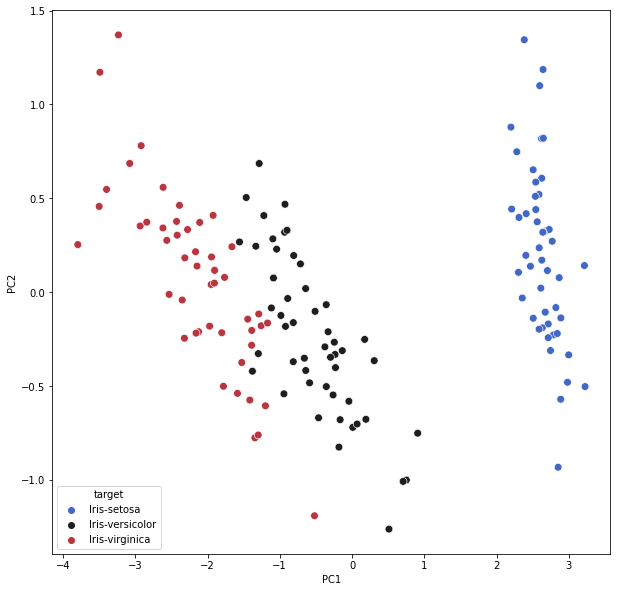

In [17]:
# Visualization of the results
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', s=60, palette='icefire')
plt.show()